In [1]:
!pip install stopwords

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from nltk import word_tokenize 
import string
string.punctuation #pre-defined in the string module,containing all the characters as a string
from nltk.stem import WordNetLemmatizer



In [3]:
#LOAD THE TRAIN AND TEST DATASETS

In [4]:
train = pd.read_csv('TrainData.csv', encoding = 'ISO-8859-1')

train.head()

,UserID,ReviewText,Polarity
0,13131,"Awful! Awful! Awful! No, didn't like it. obvio...",0
1,13827,John (Ben Chaplin) lonely bank clerk lives sma...,1
2,3912,Stoic laconic soldier Sergeant Todd (a fine cr...,1
3,14762,excited see film always heard scary.<br /><br ...,1
4,7369,"Jungle Fever highly stylized, stereotyped, com...",0


In [5]:
train.shape

(16750, 3)

In [6]:
test = pd.read_csv('TestData.csv', encoding = 'ISO-8859-1')

test.head()

,UserID,ReviewText
0,7868,'The Luzhin Defence' good film fine central pe...
1,25016,"Cannon Movie Tale worst lot, positive proof fi..."
2,10668,full length feature film world bridge. found f...
3,14640,"Soloist ingredients impress Academy. director,..."
4,15018,saw back '94 finally released. Apparently Orio...


In [7]:
#BASIC CHECKS FOR THE DATASETS

In [8]:
test.shape

(8250, 2)

In [9]:

train.Polarity.unique()

array([0, 1], dtype=int64)

In [10]:
Polarity = train.Polarity.value_counts()
print(Polarity)

0    8403
1    8347
Name: Polarity, dtype: int64


In [11]:
#DISTRIBUTION OF THE TARGET VARIABLE:'POLARITY' IN THE TRAIN DATASET

c:\users\karunya\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


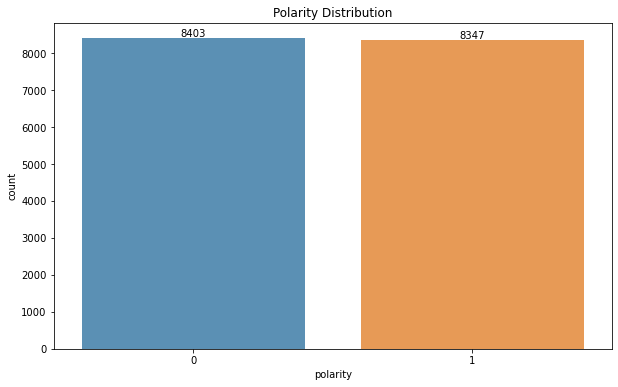

In [12]:
import seaborn as sns
x=train['Polarity'].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Polarity Distribution")
plt.ylabel('count')
plt.xlabel('polarity')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [13]:
#checking of null values
train.isnull().sum()

UserID        0
ReviewText    0
Polarity      0
dtype: int64

In [14]:
test.isnull().sum()

UserID        0
ReviewText    0
dtype: int64

In [15]:
# text preprocessing helper functions
ReviewText = '''Awful! Awful! Awful! No, didn't like it. obvious intent film was: track wheeling dealing "movers shakers" produce film. cases, people represent are. didn't need film tell shallow people film industry are. suppose I'm fault really expected something like "Roman Holiday".<br /><br />I'm movie-maker take film classes appeared film consisted series 'two-shots' (in main) actors(!) supplied loose plot-line improvise dialogue. Henry Jaglon makes claim along Victoria Foyt actually wrote screenplay impression actors, cognisant general direction film, extemporised dialogue - always successful. case point Ron Silver made remark really didn't flow along line conversation (and I'm going back look it!) Greta Scacchi broke laughter even though supposed serious conversation, Silver's remark non sequitur. get impression one actor deliberately tries 'wrong foot' actor break his/her concentration. Another instance producer tells Silver "bring &*%#@#^ documents" (3 times). Silver looked literally lost words. seen one film looked like series drama workshops improvisation awful too!<br /><br />The fact Jaglon able attract Greta Scacchi (no stranger Australia), Ron Silver, Anouk Ami, Maximilian Schell suggests 'slow news week' them. Peter Bogdanovich 'what-the-hell-am-I-doing-here' look face times expected hear say: "Look, I'm director screenwriter - actor" - would unnecessary state! Faye Dunaway seemed interested promoting son, Liam. Apart jerky delivery dialogue, hand-held camera became irritating even verisimilitude - suspect "natural" dialogue - interest principals became subsumed interest various youths walking along strand trying insinuate shot. least approached Cinema Verite. that, along irritating French singing used mute button, made generally disappointing 90-odd minutes.<br /><br />I think avoid apotheosising films this. Trying see value film little credit order substantiate perceived transcendental level misguided. really nothing avant-garde it. didn't come across work art yet wasn't documentary either. know, mocumentary real test whether entertaining. bored skull! one redeeming feature: pronounced 'Cannes' correctly gave 3/10.'''

In [16]:
# text preprocessing helper functions
def clean_text(ReviewText):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    ReviewText = ReviewText.lower()
    ReviewText = re.sub('https?://\S+|www\.\S+', '', ReviewText)
    ReviewText = re.sub('<.*?>+', '', ReviewText)
    ReviewText = re.sub('[%s]' % re.escape(string.punctuation), '', ReviewText)
    ReviewText = re.sub('\n', '', ReviewText)
    ReviewText = re.sub('\w*\d\w*', '', ReviewText)
    return ReviewText


def text_preprocessing(ReviewText):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(ReviewText)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

#clean_text() function applies a first round of text cleaning techniques.
#the function text_preprocessing() then takes in the processed text from the clean_text() function and applies techniques like tokenization and stop word removal.

In [17]:
print(ReviewText)

Awful! Awful! Awful! No, didn't like it. obvious intent film was: track wheeling dealing "movers shakers" produce film. cases, people represent are. didn't need film tell shallow people film industry are. suppose I'm fault really expected something like "Roman Holiday".<br /><br />I'm movie-maker take film classes appeared film consisted series 'two-shots' (in main) actors(!) supplied loose plot-line improvise dialogue. Henry Jaglon makes claim along Victoria Foyt actually wrote screenplay impression actors, cognisant general direction film, extemporised dialogue - always successful. case point Ron Silver made remark really didn't flow along line conversation (and I'm going back look it!) Greta Scacchi broke laughter even though supposed serious conversation, Silver's remark non sequitur. get impression one actor deliberately tries 'wrong foot' actor break his/her concentration. Another instance producer tells Silver "bring &*%#@#^ documents" (3 times). Silver looked literally lost wor

In [18]:
# Applying the cleaning function to both test and training datasets

train['text_clean'] = train['ReviewText'].apply(str).apply(lambda x: text_preprocessing(x))
test['text_clean'] = test['ReviewText'].apply(str).apply(lambda x: text_preprocessing(x))

In [20]:
lm = WordNetLemmatizer()
#lemmetizing to analyse the words as a single item

def own_analyser(review):
    review = review.split()
    for i in range(0,len(review)):
        k = review.pop(0)
        if k not in string.punctuation:
                review.append(lm.lemmatize(k).lower())    
    return review

In [21]:
stop = stopwords.words('english')
train['text_clean'].apply(lambda x: [item for item in x if item not in stop])

0        [w, f, u, l,  , w, f, u, l,  , w, f, u, l,  , ...
1        [j, h, n,  , b, e, n,  , c, h, p, l, n,  , l, ...
2        [c,  , l, c, n, c,  , l, e, r,  , e, r, g, e, ...
3        [e, x, c, e,  , e, e,  , f, l,  , l, w,  , h, ...
4        [j, u, n, g, l, e,  , f, e, v, e, r,  , h, g, ...
                               ...                        
16745    [l, k, e,  , q, u, e,  , n, r,  , f, r,  , p, ...
16746    [h, u, g, h,  , e, q, u, e, l,  , r,  , e, n, ...
16747    [l,  , l, k, e,  , h, e, r, e,  , c, r,  , f, ...
16748    [h, g, h, l,  , r, e, c, e, n,  , f, l,  , e, ...
16749    [b, l, l,  , e,  , b, c, k,  , e,  , e, v, l, ...
Name: text_clean, Length: 16750, dtype: object

In [22]:
test['text_clean'].apply(lambda x: [item for item in x if item not in stop])

0       [h, e,  , l, u, z, h, n,  , e, f, e, n, c, e, ...
1       [c, n, n, n,  , v, e,  , l, e,  , w, r,  , l, ...
2       [f, u, l, l,  , l, e, n, g, h,  , f, e, u, r, ...
3       [l,  , n, g, r, e, e, n,  , p, r, e,  , c, e, ...
4       [w,  , b, c, k,  , f, n, l, l,  , r, e, l, e, ...
                              ...                        
8245    [v, c,  , r, c, h, r,  , r, e, f, u,  , b,  , ...
8246    [p, n, c,  , n, e, v, e, r,  , g,  , g,  , h, ...
8247    [p, l, n, g,  , k, l, e, h, p, p, e, r,  , c, ...
8248    [u,  , n, e,  , w, r,  , v, e,  , e, v, e, r, ...
8249    [w, n, e, r, f, u, l,  , v, e,  , l,  , w,  , ...
Name: text_clean, Length: 8250, dtype: object

In [23]:
train = train.drop(['ReviewText'], axis=1)
train.head()

,UserID,Polarity,text_clean
0,13131,0,awful awful awful no didnt like it obvious int...
1,13827,1,john ben chaplin lonely bank clerk lives small...
2,3912,1,stoic laconic soldier sergeant todd a fine cre...
3,14762,1,excited see film always heard scarywhats inter...
4,7369,0,jungle fever highly stylized stereotyped comes...


In [24]:
test = test.drop(['ReviewText'], axis=1)
test.head()

,UserID,text_clean
0,7868,the luzhin defence good film fine central perf...
1,25016,cannon movie tale worst lot positive proof fiv...
2,10668,full length feature film world bridge found fi...
3,14640,soloist ingredients impress academy director j...
4,15018,saw back finally released apparently orion pic...


In [26]:
lm = WordNetLemmatizer()
#lemmetizing to analyse the words as a single item

def own_analyser(review):
    review = review.split()
    for i in range(0,len(review)):
        k = review.pop(0)
        if k not in string.punctuation:
                review.append(lm.lemmatize(k).lower())    
    return review

In [27]:
X=train.text_clean
y=train.Polarity

In [28]:
from sklearn.model_selection import train_test_split
phrase_train,phrase_test,sentiment_train,sentiment_test = train_test_split(X,y,test_size=0.3)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# MODEL BUILDING FOR THE TRAIN DATASET

# ✔ NAIVE BAYES (MULTINOMIAL)

In [30]:
#Using pipeline feature of sklearn 
#pipeline feature is good to use for feature selection

In [31]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('BOW',CountVectorizer(analyzer=own_analyser)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',MultinomialNB())])

In [32]:
pipeline.fit(phrase_train,sentiment_train)

Pipeline(steps=[('BOW',
                 CountVectorizer(analyzer=<function own_analyser at 0x1264BB68>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [33]:
predictions = pipeline.predict(phrase_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(sentiment_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      2550
           1       0.87      0.84      0.86      2475

    accuracy                           0.86      5025
   macro avg       0.86      0.86      0.86      5025
weighted avg       0.86      0.86      0.86      5025



# ✔ NAIVE BAYES (BERNOULLI)

In [36]:
from sklearn.pipeline import Pipeline

pipeline0 = Pipeline([('BOW',CountVectorizer(analyzer=own_analyser)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',BernoulliNB())])

In [37]:
pipeline0.fit(phrase_train,sentiment_train)

Pipeline(steps=[('BOW',
                 CountVectorizer(analyzer=<function own_analyser at 0x1264BB68>)),
                ('tfidf', TfidfTransformer()), ('classifier', BernoulliNB())])

In [38]:
predictionsBernoulli = pipeline0.predict(phrase_test)

In [39]:
print(classification_report(sentiment_test,predictionsBernoulli))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2550
           1       0.87      0.80      0.83      2475

    accuracy                           0.84      5025
   macro avg       0.84      0.84      0.84      5025
weighted avg       0.84      0.84      0.84      5025



# ✔ LINEAR SVC

In [40]:
from sklearn.pipeline import Pipeline

pipeline1 = Pipeline([('BOW',CountVectorizer(analyzer=own_analyser)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',LinearSVC())])

In [41]:
pipeline1.fit(phrase_train,sentiment_train)

Pipeline(steps=[('BOW',
                 CountVectorizer(analyzer=<function own_analyser at 0x1264BB68>)),
                ('tfidf', TfidfTransformer()), ('classifier', LinearSVC())])

In [42]:
predictionsSVC = pipeline1.predict(phrase_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(sentiment_test,predictionsSVC))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2550
           1       0.87      0.90      0.88      2475

    accuracy                           0.88      5025
   macro avg       0.88      0.88      0.88      5025
weighted avg       0.88      0.88      0.88      5025



# ✔ LOGISTIC REGRESSION

In [46]:
from sklearn.pipeline import Pipeline

pipeline2 = Pipeline([('BOW',CountVectorizer(analyzer=own_analyser)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',LogisticRegression())])

In [47]:
pipeline2.fit(phrase_train,sentiment_train)

Pipeline(steps=[('BOW',
                 CountVectorizer(analyzer=<function own_analyser at 0x1264BB68>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [48]:
predictionsLogisticR = pipeline2.predict(phrase_test)

In [49]:
print(classification_report(sentiment_test,predictionsLogisticR))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      2550
           1       0.86      0.90      0.88      2475

    accuracy                           0.88      5025
   macro avg       0.88      0.88      0.88      5025
weighted avg       0.88      0.88      0.88      5025



# ✔ RANDOM FOREST CLASSIFIER

In [50]:
from sklearn.pipeline import Pipeline

pipeline3 = Pipeline([('BOW',CountVectorizer(analyzer=own_analyser)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',RandomForestClassifier())])

In [51]:
pipeline3.fit(phrase_train,sentiment_train)

Pipeline(steps=[('BOW',
                 CountVectorizer(analyzer=<function own_analyser at 0x1264BB68>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [52]:
predictionsLogisticR = pipeline3.predict(phrase_test)

In [53]:
print(classification_report(sentiment_test,predictionsLogisticR))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2550
           1       0.83      0.81      0.82      2475

    accuracy                           0.82      5025
   macro avg       0.82      0.82      0.82      5025
weighted avg       0.82      0.82      0.82      5025



### we get the highest accuracy of 88% from LinearSVC and Logistic Regression

# APPLYING IN TEST DATASET

In [54]:
test = pd.read_csv('test_df.csv', encoding = 'ISO-8859-1')

test.head()

,Unnamed: 0,UserID,ReviewText,text_clean
0,0,7868,'The Luzhin Defence' good film fine central pe...,the luzhin defence good film fine central perf...
1,1,25016,"Cannon Movie Tale worst lot, positive proof fi...",cannon movie tale worst lot positive proof fiv...
2,2,10668,full length feature film world bridge. found f...,full length feature film world bridge found fi...
3,3,14640,"Soloist ingredients impress Academy. director,...",soloist ingredients impress academy director j...
4,4,15018,saw back '94 finally released. Apparently Orio...,saw back finally released apparently orion pic...


In [55]:
test_d = test.drop(['Unnamed: 0','ReviewText'], axis=1)
test_d.head()

,UserID,text_clean
0,7868,the luzhin defence good film fine central perf...
1,25016,cannon movie tale worst lot positive proof fiv...
2,10668,full length feature film world bridge found fi...
3,14640,soloist ingredients impress academy director j...
4,15018,saw back finally released apparently orion pic...


In [56]:
test_d.isnull().sum()

UserID        0
text_clean    1
dtype: int64

In [57]:
test_data = test_d.dropna()

In [58]:
test_data.isnull().sum()

UserID        0
text_clean    0
dtype: int64

## applying LinearSVC model with highest accuracy

In [59]:
test_predictions = pipeline1.predict(test_data['text_clean'])

In [60]:
User_ID = test_data['UserID'].values

In [61]:
test_predictions.shape

(8249,)

In [62]:
#the dataframe formation with predicted response for test data

In [63]:
submission = pd.DataFrame({'UserID':User_ID,'Polarity':test_predictions})

In [64]:
submission 

,UserID,Polarity
0,7868,1
1,25016,0
2,10668,1
3,14640,0
4,15018,0
...,...,...
8244,11802,0
8245,8160,1
8246,3499,1
8247,13899,0


In [65]:
#csv file containing UserID and predicted Response in a csv file for test data

In [66]:
submission.to_csv('SUBMISSION.csv')